In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

Labels is:Rings

Features are:Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight	

In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('abalone.csv')
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [3]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# 1.Observations

1.No null values as count is same

2.mean and media is almost same in all, hence less outliers

3.height min is 0, which is not possible

4.Sex -M, F, and I (infant)

5.Length measured in mm 

6.Diameter measured in mm 

7.Height measured in mm 

8.Whole weight measured in grams 

9.Shucked weight measured in grams 

10.Viscera weight measured in grams 

11.Shell weight measured in grams

12.Rings measured in integer--> gives the age in years

13.Difference between mean and standard deviation is high in Whole weight,Shucked weight,Viscera weight	and Shell weight. This shows the  data is spread out

# 2.Checking number and type of columns¶

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
len(df.columns)

9

There are 9 columns where 1 is nominal data and 8 are continous

# 3.finding if null values are there

In [6]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

No null values present

# 4.Removing duplicate values

In [7]:
df.drop_duplicates(inplace=True)

# 5.Label encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df1=lab_enc.fit_transform(df['Sex'])
pd.Series(df1)

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Length: 4177, dtype: int32

In [9]:
#replacing the encoded data in the dataframe
df['Sex']=df1

df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,2,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


The label encoding has been done:

Male-->2

female-->0

infant-->1

# 6.Dealing with outliers

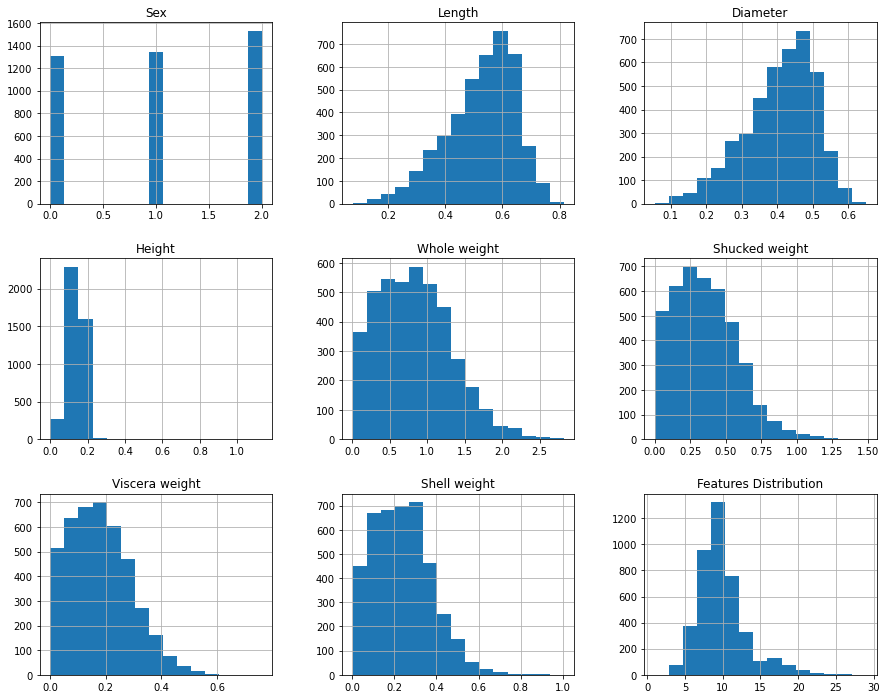

In [10]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

In [11]:
#Applying zscore only on continous data, so extracting them
x=df.drop(["Sex"],axis=1)

#Using zscore
from scipy.stats import zscore
z=np.abs(zscore(x))
threshold=3
df_no_outliers=df[(z<3)&(z>-3)]

df_no_outliers.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,NaN,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,NaN,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,NaN,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,NaN,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,NaN,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0


In [12]:
df.shape

(4177, 9)

In [13]:
df_no_outliers.shape

(4177, 9)

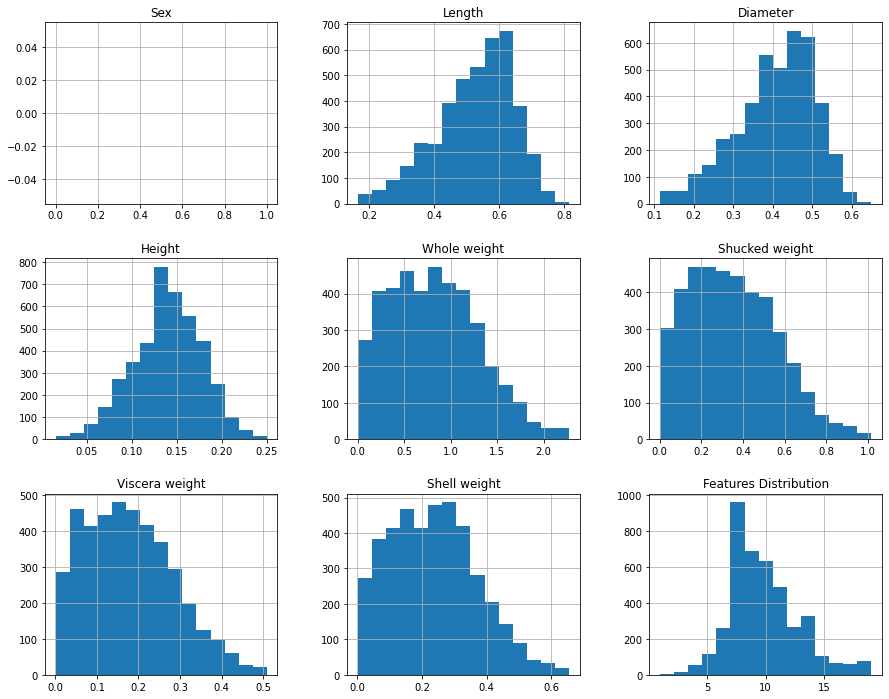

In [14]:
df_no_outliers.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

array([[<AxesSubplot:title={'center':'Height'}>]], dtype=object)

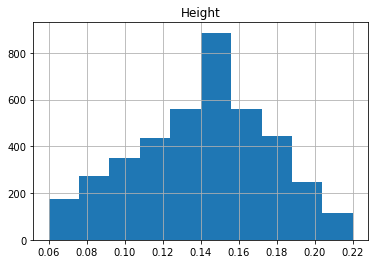

In [15]:
#Applying zscore on height
x=df["Height"]

#Using zscore
from scipy.stats import zscore
z=np.abs(zscore(x))
threshold=3
df_no_outliers=df[(z<2)]

df_no_outliers.hist(column="Height")

array([[<AxesSubplot:title={'center':'Whole weight'}>]], dtype=object)

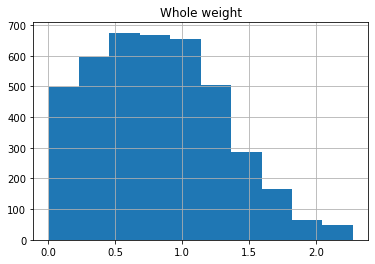

In [16]:
#Applying zscore on Whole weight
x=df["Whole weight"]

#Using zscore
from scipy.stats import zscore
z=np.abs(zscore(x))
threshold=3
df_no_outliers=df[(z<3)]

df_no_outliers.hist(column="Whole weight")

# 7.Transformation to remove skewness

In [17]:
x=df_no_outliers.drop(["Rings"],axis=1)
x.skew()


Sex              -0.095379
Length           -0.660699
Diameter         -0.630915
Height            3.183242
Whole weight      0.425012
Shucked weight    0.599114
Viscera weight    0.503838
Shell weight      0.576420
dtype: float64

In [18]:
#removing skewness using power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

df_new.skew()

Sex              -0.175168
Length           -0.074791
Diameter         -0.074964
Height           -0.117982
Whole weight     -0.010193
Shucked weight    0.024838
Viscera weight    0.037703
Shell weight      0.021809
dtype: float64

Skewness is reduced using the power transform

# 8.vif

In [19]:
x=df_no_outliers.drop(columns=["Rings"])
y=df_no_outliers['Rings']

In [20]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

vif=pd.DataFrame()
vif["quality"]=[variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif["feature"]=x.columns
vif

,quality,feature
0,1.010652,Sex
1,40.476595,Length
2,41.360321,Diameter
3,3.529240,Height
4,110.345275,Whole weight
5,28.139476,Shucked weight
6,17.228705,Viscera weight
7,21.246083,Shell weight


Since Whole Weight has high multicollinearity, we will drop it

In [21]:
df_no_outliers.drop(columns=["Whole weight"],inplace=True)
df_no_outliers

,Sex,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,0.5310,0.2610,0.2960,10


In [22]:
x1=df_no_outliers.drop(columns=["Rings"])
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x1)

vif=pd.DataFrame()
vif["quality"]=[variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif["feature"]=x1.columns
vif

,quality,feature
0,1.010619,Sex
1,40.473206,Length
2,41.325463,Diameter
3,3.526646,Height
4,8.881191,Shucked weight
5,10.598304,Viscera weight
6,7.742510,Shell weight


Multicollinearity is addressed

In [23]:
df.shape

(4177, 9)

In [24]:
df_no_outliers.shape

(4158, 8)

We have removed 19 data during preprocessing and dropped Whole weigth due to multicollinearity

# 9.Train test split

In [25]:
x=df_no_outliers.drop(columns=["Rings"])
y=df_no_outliers['Rings']

In [26]:
x

,Sex,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,0.5310,0.2610,0.2960


In [27]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4158, dtype: int64

In [28]:
#scaling
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [29]:
#splitting the data into train and test
x_train, x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=10)

In [30]:
y_train.head()

3005    13
884     10
444     10
3821    10
3669     9
Name: Rings, dtype: int64

# 10. Finding best random state

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0


for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    predrf=LR.predict(x_test)
    acc=r2_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy is", maxAccu,"on Random State",maxRS)



Best accuracy is 0.5530848143731752 on Random State 122


# 11. Testing various models

In [32]:
 x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=42)

In [33]:
from sklearn.metrics import r2_score

In [34]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)

print(r2_score(y_test,predlr))

0.506349055110245


In [35]:
from sklearn.tree import DecisionTreeClassifier


dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)

print(r2_score(y_test,preddt))

0.07573326029096328


In [36]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

print(r2_score(y_test,preddt))

0.07573326029096328


# 12.Finding overfitting

In [37]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Linear Regression model :", scr.mean())

Cross validation score of Linear Regression model : 0.37891944183698223


In [38]:
scr=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree model :", scr.mean())

Cross validation score of Decision Tree model : 0.19697682356752752


In [39]:
scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest model :", scr.mean())

Cross validation score of Random Forest model : 0.24411158937332225


The lowest difference is for linear regression

# 13.HyperParameter tuning

In [40]:
from sklearn.model_selection import train_test_split
#splitting the data into train and test
x_train, x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=10)

In [41]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [42]:
lreg.fit(x_train, y_train)

LinearRegression()

In [43]:
testResult = lreg.predict(x_test)

# score of model before hypertuning


In [87]:
from sklearn.metrics import r2_score
print("The r2_score of the model is \n_____________\n")
r2_score(y_test, testResult)

The r2_score of the model is 
_____________



0.5272210658174405

In [88]:
from sklearn.model_selection import GridSearchCV 

In [96]:
parameters = {'fit_intercept':['True', 'False'],
                'copy_X':['True', 'False']}


In [97]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=5)


In [98]:
GCV.fit(df.drop(["Rings"], axis=1),df['Rings'])

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False']})

In [99]:
GCV.best_estimator_

LinearRegression(copy_X='True', fit_intercept='True')

In [103]:
mod=LinearRegression(copy_X='True', fit_intercept='True')

In [104]:
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(r2_score(y_test,pred)*100)

52.72210658174406


# score of model after hypertuning

In [54]:
from sklearn.metrics import r2_score
print("The r2_score of the model is \n_____________\n")
r2_score(y_test, testResult)


The r2_score of the model is 
_____________



0.5272210658174405

# ROC AUC score

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [56]:
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
lr=LinearRegression()

In [57]:
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)


RandomForestClassifier()

In [58]:
lr.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)


0.23942307692307693

In [59]:
r2_score(y_test,rf.predict(x_test))

0.38962801941756287

In [60]:
r2_score(y_test,dt.predict(x_test))

0.18565241246922093

In [61]:
r2_score(y_test,lr.predict(x_test))

0.5272210658174405

The r2 score of the prediction of linear regression is highest

# Saving

In [62]:
LinearRegression_tree_model=LinearRegression()
LinearRegression_tree_model.fit(x_train,y_train)

filename='finalized_model.pickle'
pickle.dump(LinearRegression_tree_model,open(filename,'wb'))

# Prediction

In [63]:
#prediction using the saved model
loaded_model=pickle.load(open(filename,'rb'))
a=loaded_model.predict(scaler.transform([[1,0.330,0.255,0.080,0.0895,0.0395,0.055]]))

# Adjusted R2

In [64]:
LinearRegression_tree_model.score(x_train,y_train)

0.503172815285223

In [65]:
y_pred=LinearRegression_tree_model.predict(x_test)

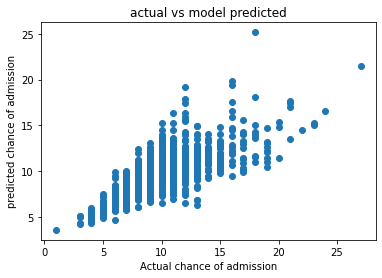

In [66]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('actual vs model predicted')
plt.show()

# Model evaluation¶

In [67]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

4.677986696998464

# Regularisation

In [68]:
from sklearn.linear_model import Lasso,LassoCV

lasscv=LassoCV(alphas=None, max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

#best alpha parameter
alpha=lasscv.alpha_

lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

lasso_reg.score(x_test,y_test)

0.5272481360796637